In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio

from scipy.io.wavfile import read as wavread
from scipy.signal import stft

import pandas as pd

import os
#asdn

In [2]:
path_ds = '/home/edoardobucheli/Datasets/freesound-audio-tagging-2019/'
path_train_curated = os.path.join(path_ds,'train_curated')

In [3]:
df_train = pd.read_csv(os.path.join(path_ds,'train_curated.csv'))

In [4]:
batch_size = 16
sr=44100

In [5]:
df_train[:10]

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping
5,003be5db.wav,Whispering
6,0041de6b.wav,"Acoustic_guitar,Strum"
7,004ca909.wav,Hi-hat
8,00713ec2.wav,Bass_drum
9,0073825a.wav,"Crowd,Cheering"


In [6]:
names = df_train['fname'].tolist()
names_paths = [os.path.join(path_train_curated,f) for f in names]

In [40]:
_fs, _wav = wavread(names_paths[0])

In [52]:
hola,soy,X = stft(_wav,fs = 44100,nfft = 512)

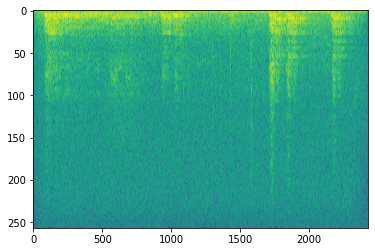

In [53]:
plt.imshow(20*np.log10(np.abs(X)),aspect = 'auto')

In [8]:
def decode_audio(fp, wave_size = 44100, fs = None, num_channels = 1, normalize = True, fast_wav = True):
    
    if fast_wav:
        _fs, _wav = wavread(fp)
        if _wav.dtype == np.int16:
            _wav = _wav.astype(np.float32)
            _wav /= 32768
        else:
            assert _wav.dtype == np.float32        
    if _wav.ndim == 1:
        nsamps = _wav.shape[0]
        nch = 1
    else:
        nsamps,nch = _wav.shape
        _wav = np.concatenate((_wav,np.zeros(())))
        _wav = np.mean(_wav,axis=-1, keepdims=True)        
    
    if nsamps > wave_size:
        max_start = nsamps - wave_size
        start = np.random.randint(0,max_start)
        _wav = _wav[start:start+wave_size]
    elif nsamps <= wave_size:
        diff = wave_size-nsamps
        _wav = np.pad(_wav,(0,diff),'constant')
    
    if normalize:
        divisor = np.max(np.abs(_wav))
        if divisor > 0:
            _wav /= divisor
            
    _wav = np.reshape(_wav,[wave_size,1,nch])
    return _wav

In [ ]:
def make_spectrogram(audio,):
    

In [11]:
def decode_extract_and_batch(fps,
                             batch_size=8,
                             slice_len=44100,
                             decode_fs=None,
                             decode_num_chanels=1,
                             decode_normalize=True,
                             decode_fast_wav=True,
                             decode_parallel_calls=1,
                             repeat=False,
                             shuffle=False,
                             shuffle_buffer_size=None,
                             prefetch_size=None,
                             prefetch_gpu_num=None):
    
    dataset = tf.data.Dataset.from_tensor_slices(fps)
    
    def _decode_audio_shaped(fp):
        _decode_audio_closure = lambda _fp: decode_audio(_fp,
                                                         fs=decode_fs,
                                                         num_channels=decode_num_chanels,
                                                         normalize=decode_normalize,
                                                         fast_wav=decode_fast_wav)
        audio = tf.numpy_function(_decode_audio_closure,
                           [fp],
                           tf.float32)
        audio.set_shape([None,1,decode_num_chanels])
        
        return audio
    
    dataset = dataset.map(_decode_audio_shaped,num_parallel_calls = decode_parallel_calls)
    dataset = dataset.batch(batch_size, drop_remainder=True)
    
    return dataset

In [30]:
ds = decode_extract_and_batch(names_paths,batch_size=64)

In [31]:
iterator = ds.make_initializable_iterator()
next_step = iterator.get_next()

In [32]:
sess = tf.Session()

In [33]:
for edo in ds:
    print(edo)
    break

Tensor("IteratorGetNext_5:0", shape=(64, ?, 1, 1), dtype=float32)


In [34]:
sess.run(iterator.initializer)

In [35]:
edo = sess.run(next_step)

In [36]:
edo.shape

(64, 44100, 1, 1)

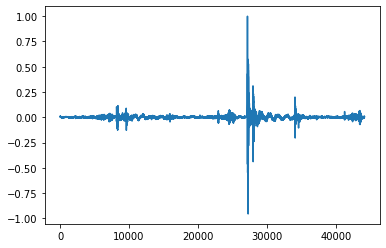

In [37]:
plt.plot(edo[3,:,0,0])

In [38]:
Audio(edo[3,:,0,0],rate = sr)

9


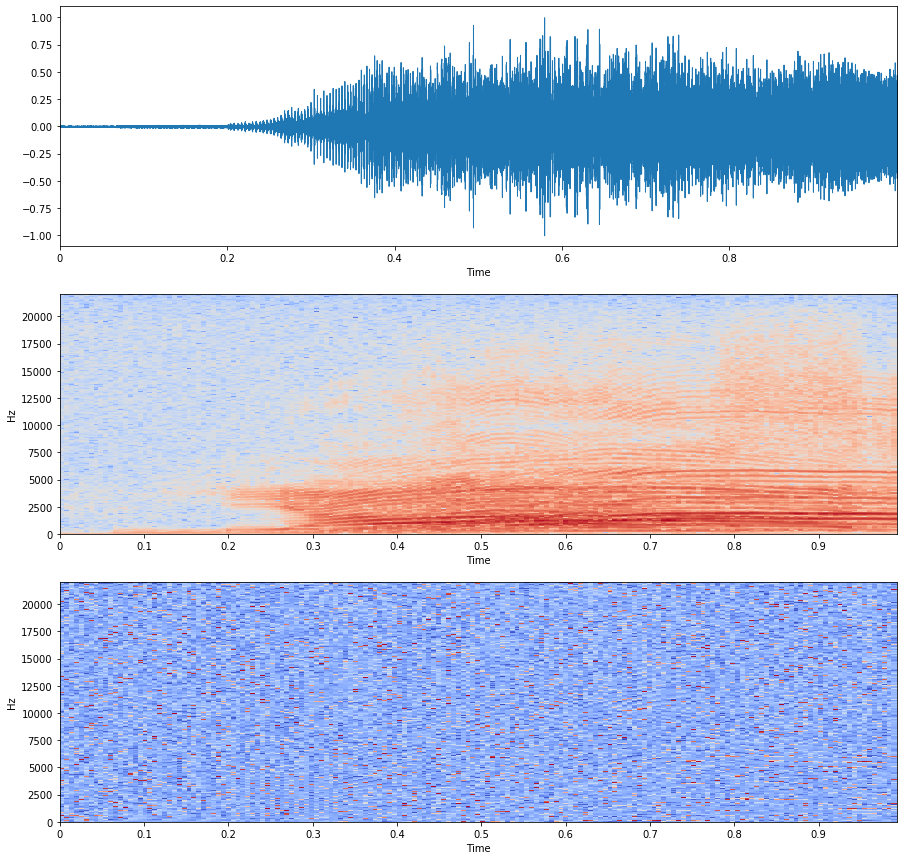

In [38]:
n = np.random.randint(0,16)
print(n)
plt.figure(figsize = (15,15))
plt.subplot(3,1,1)
librosa.display.waveplot(this_wave[n].squeeze(0),sr = sr)
plt.subplot(3,1,2)
librosa.display.specshow(this_mX[n].squeeze(0).T,x_axis='time',y_axis='linear',sr=sr,hop_length=256)
plt.subplot(3,1,3)
librosa.display.specshow(np.diff(np.unwrap(this_pX[n].squeeze(0),axis=1),axis=1).T,x_axis='time',y_axis='linear',sr=sr,hop_length=256)

In [39]:
Audio(this_wave[n].squeeze(0),rate = sr)